# drive mount

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# valid EDA

In [78]:
file_path = "/content/drive/MyDrive/2nd/football/data/valid.csv"   # 본인 CSV 경로 지정
df_valid = pd.read_csv(file_path)

In [79]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              1442 non-null   object 
 1   player_name                         1442 non-null   object 
 2   player_id                           1442 non-null   int64  
 3   goals                               1442 non-null   int64  
 4   assists                             1442 non-null   int64  
 5   yellow_cards                        1442 non-null   int64  
 6   red_cards                           1442 non-null   int64  
 7   season_win_count                    1442 non-null   int64  
 8   season_avg_minutes                  1442 non-null   float64
 9   club_squad_size                     1442 non-null   float64
 10  club_average_age                    1442 non-null   float64
 11  club_foreigners_percentage          1442 no

In [80]:
# 결측치 제거
df_valid.isnull().sum()

,0
season,0
player_name,0
player_id,0
goals,0
assists,0
yellow_cards,0
red_cards,0
season_win_count,0
season_avg_minutes,0
club_squad_size,0


In [81]:
# 결측치 있는 row 삭제
df_valid_final = df_valid.dropna()
df_valid_final.isnull().sum()

,0
season,0
player_name,0
player_id,0
goals,0
assists,0
yellow_cards,0
red_cards,0
season_win_count,0
season_avg_minutes,0
club_squad_size,0


In [82]:
df_valid_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 0 to 1441
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              1085 non-null   object 
 1   player_name                         1085 non-null   object 
 2   player_id                           1085 non-null   int64  
 3   goals                               1085 non-null   int64  
 4   assists                             1085 non-null   int64  
 5   yellow_cards                        1085 non-null   int64  
 6   red_cards                           1085 non-null   int64  
 7   season_win_count                    1085 non-null   int64  
 8   season_avg_minutes                  1085 non-null   float64
 9   club_squad_size                     1085 non-null   float64
 10  club_average_age                    1085 non-null   float64
 11  club_foreigners_percentage          1085 non-nul

In [83]:
# 라벨 인코딩

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 제외할 컬럼
exclude_cols = ["player_name", "date_of_birth", "agent_name", "net_transfer_record","country_of_birth"]

# object 컬럼 중에서 제외 대상 빼고 인코딩할 컬럼만 선택
categorical_cols = df_valid_final.select_dtypes(include=["object"]).columns
encode_cols = [col for col in categorical_cols if col not in exclude_cols]

# 원본 복사
df_player_final_encoded = df_valid_final.copy()

# 라벨 인코딩 적용
label_encoders = {}
for col in encode_cols:
    le = LabelEncoder()
    df_player_final_encoded[col] = le.fit_transform(df_player_final_encoded[col].astype(str))
    label_encoders[col] = le  # 필요하다면 나중에 inverse_transform 할 때 사용 가능

print(df_player_final_encoded.head())

   season      player_name  player_id  goals  assists  yellow_cards  \
0       0  Aaron Cresswell      92571      0        0             1   
1       0  Aaron Cresswell      92571      0        0             1   
2       0     Aaron Hickey     591949      0        0             5   
3       0     Aaron Hickey     591949      0        0             5   
4       0     Aaron Hickey     591949      0        0             5   

   red_cards  season_win_count  season_avg_minutes  club_squad_size  ...  \
0          0                 3           39.272727             27.0  ...   
1          0                 3           39.272727             27.0  ...   
2          0                 2           80.000000             26.0  ...   
3          0                 2           80.000000             26.0  ...   
4          0                 2           80.000000             26.0  ...   

   foot  height_in_cm           agent_name  season_last_club_position  \
0     1         170.0  Unique Sports Group 

In [84]:
# country_of_birth 이진 인코딩
df_player_final_encoded['country_of_birth'] = df_player_final_encoded['country_of_birth'].fillna('other')  # NaN → 'other'
df_player_final_encoded['country_england'] = df_player_final_encoded['country_of_birth'].apply(lambda x: 1 if x.lower() == 'england' else 0)


In [85]:
for col, le in label_encoders.items():
    print(f"\n컬럼: {col}")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(mapping)


컬럼: season
{'23/24': np.int64(0)}

컬럼: club_name
{'Arsenal Football Club': np.int64(0), 'Association Football Club Bournemouth': np.int64(1), 'Aston Villa Football Club': np.int64(2), 'Brentford Football Club': np.int64(3), 'Brighton and Hove Albion Football Club': np.int64(4), 'Burnley FC': np.int64(5), 'Chelsea Football Club': np.int64(6), 'Crystal Palace Football Club': np.int64(7), 'Everton Football Club': np.int64(8), 'Fulham Football Club': np.int64(9), 'Liverpool Football Club': np.int64(10), 'Luton Town': np.int64(11), 'Manchester City Football Club': np.int64(12), 'Manchester United Football Club': np.int64(13), 'Newcastle United Football Club': np.int64(14), 'Nottingham Forest Football Club': np.int64(15), 'Sheffield United': np.int64(16), 'Tottenham Hotspur Football Club': np.int64(17), 'West Ham United Football Club': np.int64(18), 'Wolverhampton Wanderers Football Club': np.int64(19)}

컬럼: foot
{'both': np.int64(0), 'left': np.int64(1), 'right': np.int64(2)}

컬럼: position

In [86]:
import pandas as pd
from datetime import datetime

# date_of_birth 컬럼을 datetime으로 변환
df_player_final_encoded["date_of_birth"] = pd.to_datetime(df_player_final_encoded["date_of_birth"], errors="coerce")

# 현재 연도
current_year = datetime.now().year

# 나이 계산 (출생연도만 사용)
df_player_final_encoded["age"] = current_year - df_player_final_encoded["date_of_birth"].dt.year

print(df_player_final_encoded[["date_of_birth", "age"]].head())


  date_of_birth  age
0    1989-12-15   36
1    1989-12-15   36
2    2002-06-10   23
3    2002-06-10   23
4    2002-06-10   23


In [87]:
drop_cols = ["player_name", "date_of_birth", "agent_name", "net_transfer_record", "country_of_birth"]

# 컬럼 삭제
df_dropped = df_player_final_encoded.drop(columns=drop_cols)

print(df_dropped)

      season  player_id  goals  assists  yellow_cards  red_cards  \
0          0      92571      0        0             1          0   
1          0      92571      0        0             1          0   
2          0     591949      0        0             5          0   
3          0     591949      0        0             5          0   
4          0     591949      0        0             5          0   
...      ...        ...    ...      ...           ...        ...   
1437       0     548729      5        1             2          0   
1438       0     548729      5        1             2          0   
1439       0     193098      2        0             2          0   
1440       0     193098      2        0             2          0   
1441       0     193098      2        0             2          0   

      season_win_count  season_avg_minutes  club_squad_size  club_average_age  \
0                    3           39.272727             27.0              28.5   
1                    

In [88]:
df_validation = df_dropped

In [89]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 0 to 1441
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              1085 non-null   int64  
 1   player_id                           1085 non-null   int64  
 2   goals                               1085 non-null   int64  
 3   assists                             1085 non-null   int64  
 4   yellow_cards                        1085 non-null   int64  
 5   red_cards                           1085 non-null   int64  
 6   season_win_count                    1085 non-null   int64  
 7   season_avg_minutes                  1085 non-null   float64
 8   club_squad_size                     1085 non-null   float64
 9   club_average_age                    1085 non-null   float64
 10  club_foreigners_percentage          1085 non-null   float64
 11  club_national_team_players          1085 non-nul

In [90]:
import pandas as pd

# 3️⃣ player_age vs club_average_age
df_validation["age_diff_club"] = df_validation["age"] - df_validation["club_average_age"]
df_validation["age_ratio_club"] = df_validation["age"] / (df_validation["club_average_age"] + 1e-6)  # 0 나눗셈 방지

# 4️⃣ (goals + assists) vs season_win_count
df_validation["goal_assist"] = df_validation["goals"] + df_validation["assists"]
df_validation["goal_assist_win_ratio"] = df_validation["goal_assist"] / (df_validation["season_win_count"] + 1)  # 0회 방지

# 7️⃣ yellowcards vs season_avg_minutes
df_validation["yellow_per_minute"] = df_validation["yellow_cards"] / (df_validation["season_avg_minutes"] + 1)  # 0분 방지

# 확인
print(df_validation[[
    "age", "club_average_age", "age_diff_club", "age_ratio_club",
    "goals", "assists", "season_win_count", "goal_assist", "goal_assist_win_ratio",
    "yellow_cards", "season_avg_minutes", "yellow_per_minute"
]].head())

df_validation.info()

   age  club_average_age  age_diff_club  age_ratio_club  goals  assists  \
0   36              28.5            7.5        1.263158      0        0   
1   36              28.5            7.5        1.263158      0        0   
2   23              25.4           -2.4        0.905512      0        0   
3   23              25.4           -2.4        0.905512      0        0   
4   23              25.4           -2.4        0.905512      0        0   

   season_win_count  goal_assist  goal_assist_win_ratio  yellow_cards  \
0                 3            0                    0.0             1   
1                 3            0                    0.0             1   
2                 2            0                    0.0             5   
3                 2            0                    0.0             5   
4                 2            0                    0.0             5   

   season_avg_minutes  yellow_per_minute  
0           39.272727           0.024831  
1           39.272727   

In [91]:
df_validation.isnull().sum(), df_validation.shape, df_validation.head()

(season                                0
 player_id                             0
 goals                                 0
 assists                               0
 yellow_cards                          0
 red_cards                             0
 season_win_count                      0
 season_avg_minutes                    0
 club_squad_size                       0
 club_average_age                      0
 club_foreigners_percentage            0
 club_national_team_players            0
 player_highest_market_value_in_eur    0
 club_name                             0
 foot                                  0
 height_in_cm                          0
 season_last_club_position             0
 position                              0
 sub_position                          0
 season_player_played                  0
 market_value_in_eur                   0
 transfer                              0
 country_england                       0
 age                                   0
 age_diff_club  

# train EDA

In [9]:
file_path = "/content/drive/MyDrive/2nd/football/data/train.csv"   # 본인 CSV 경로 지정
df_train = pd.read_csv(file_path)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14873 entries, 0 to 14872
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              14873 non-null  object 
 1   player_name                         14873 non-null  object 
 2   player_id                           14873 non-null  int64  
 3   goals                               14873 non-null  int64  
 4   assists                             14873 non-null  int64  
 5   yellow_cards                        14873 non-null  int64  
 6   red_cards                           14873 non-null  int64  
 7   season_win_count                    14873 non-null  int64  
 8   season_avg_minutes                  14873 non-null  float64
 9   club_squad_size                     14873 non-null  float64
 10  club_average_age                    14873 non-null  float64
 11  club_foreigners_percentage          14873

In [34]:
# 결측치 제거
df_train.isnull().sum()

,0
season,0
player_name,0
player_id,0
goals,0
assists,0
yellow_cards,0
red_cards,0
season_win_count,0
season_avg_minutes,0
club_squad_size,0


In [35]:
# 결측치 있는 row 삭제
df_final = df_train.dropna()
df_final.isnull().sum()

,0
season,0
player_name,0
player_id,0
goals,0
assists,0
yellow_cards,0
red_cards,0
season_win_count,0
season_avg_minutes,0
club_squad_size,0


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10038 entries, 0 to 14872
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              10038 non-null  object 
 1   player_name                         10038 non-null  object 
 2   player_id                           10038 non-null  int64  
 3   goals                               10038 non-null  int64  
 4   assists                             10038 non-null  int64  
 5   yellow_cards                        10038 non-null  int64  
 6   red_cards                           10038 non-null  int64  
 7   season_win_count                    10038 non-null  int64  
 8   season_avg_minutes                  10038 non-null  float64
 9   club_squad_size                     10038 non-null  float64
 10  club_average_age                    10038 non-null  float64
 11  club_foreigners_percentage          10038 non-

In [37]:
# 라벨 인코딩

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 제외할 컬럼
exclude_cols = ["player_name", "date_of_birth", "agent_name", "net_transfer_record","country_of_birth"]

# object 컬럼 중에서 제외 대상 빼고 인코딩할 컬럼만 선택
categorical_cols = df_final.select_dtypes(include=["object"]).columns
encode_cols = [col for col in categorical_cols if col not in exclude_cols]

# 원본 복사
df_player_final_encoded = df_final.copy()

# 라벨 인코딩 적용
label_encoders = {}
for col in encode_cols:
    le = LabelEncoder()
    df_player_final_encoded[col] = le.fit_transform(df_player_final_encoded[col].astype(str))
    label_encoders[col] = le  # 필요하다면 나중에 inverse_transform 할 때 사용 가능

print(df_player_final_encoded.head())

    season         player_name  player_id  goals  assists  yellow_cards  \
0        0        Aaron Hughes       3580      0        0             1   
1        0        Aaron Lennon      14221      4        8             1   
2        0        Aaron Ramsey      50057      1        4             5   
9        0        Adam Lallana      43530      3        6             2   
20       0  Aleksandar Kolarov      46156      1        2             5   

    red_cards  season_win_count  season_avg_minutes  club_squad_size  ...  \
0           0                 6           88.125000             25.0  ...   
1           0                20           83.441176             30.0  ...   
2           0                20           57.944444             24.0  ...   
9           0                 7           74.633333             30.0  ...   
20          0                12           52.550000             28.0  ...   

    foot  height_in_cm           agent_name  season_last_club_position  \
0      2    

In [38]:
# country_of_birth 이진 인코딩
df_player_final_encoded['country_of_birth'] = df_player_final_encoded['country_of_birth'].fillna('other')  # NaN → 'other'
df_player_final_encoded['country_england'] = df_player_final_encoded['country_of_birth'].apply(lambda x: 1 if x.lower() == 'england' else 0)


In [39]:
for col, le in label_encoders.items():
    print(f"\n컬럼: {col}")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(mapping)


컬럼: season
{'12/13': np.int64(0), '13/14': np.int64(1), '14/15': np.int64(2), '15/16': np.int64(3), '16/17': np.int64(4), '17/18': np.int64(5), '18/19': np.int64(6), '19/20': np.int64(7), '20/21': np.int64(8), '21/22': np.int64(9), '22/23': np.int64(10), '23/24': np.int64(11)}

컬럼: club_name
{'Arsenal Football Club': np.int64(0), 'Association Football Club Bournemouth': np.int64(1), 'Aston Villa Football Club': np.int64(2), 'Brentford Football Club': np.int64(3), 'Brighton and Hove Albion Football Club': np.int64(4), 'Burnley FC': np.int64(5), 'Cardiff City': np.int64(6), 'Chelsea Football Club': np.int64(7), 'Crystal Palace Football Club': np.int64(8), 'Everton Football Club': np.int64(9), 'Fulham Football Club': np.int64(10), 'Huddersfield Town': np.int64(11), 'Hull City': np.int64(12), 'Leeds United': np.int64(13), 'Leicester City Football Club': np.int64(14), 'Liverpool Football Club': np.int64(15), 'Luton Town': np.int64(16), 'Manchester City Football Club': np.int64(17), 'Manche

In [40]:
import pandas as pd
from datetime import datetime

# date_of_birth 컬럼을 datetime으로 변환
df_player_final_encoded["date_of_birth"] = pd.to_datetime(df_player_final_encoded["date_of_birth"], errors="coerce")

# 현재 연도
current_year = datetime.now().year

# 나이 계산 (출생연도만 사용)
df_player_final_encoded["age"] = current_year - df_player_final_encoded["date_of_birth"].dt.year

print(df_player_final_encoded[["date_of_birth", "age"]].head())


   date_of_birth  age
0     1979-11-08   46
1     1987-04-16   38
2     1990-12-26   35
9     1988-05-10   37
20    1985-11-10   40


In [41]:
drop_cols = ["player_name", "date_of_birth", "agent_name", "net_transfer_record", "country_of_birth"]

# 컬럼 삭제
df_dropped = df_player_final_encoded.drop(columns=drop_cols)

print(df_dropped)

       season  player_id  goals  assists  yellow_cards  red_cards  \
0           0       3580      0        0             1          0   
1           0      14221      4        8             1          0   
2           0      50057      1        4             5          0   
9           0      43530      3        6             2          0   
20          0      46156      1        2             5          0   
...       ...        ...    ...      ...           ...        ...   
14868      11     548729      5        1             2          0   
14869      11     548729      5        1             2          0   
14870      11     193098      2        0             2          0   
14871      11     193098      2        0             2          0   
14872      11     193098      2        0             2          0   

       season_win_count  season_avg_minutes  club_squad_size  \
0                     6           88.125000             25.0   
1                    20           83.441176

In [42]:
df = df_dropped

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10038 entries, 0 to 14872
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              10038 non-null  int64  
 1   player_id                           10038 non-null  int64  
 2   goals                               10038 non-null  int64  
 3   assists                             10038 non-null  int64  
 4   yellow_cards                        10038 non-null  int64  
 5   red_cards                           10038 non-null  int64  
 6   season_win_count                    10038 non-null  int64  
 7   season_avg_minutes                  10038 non-null  float64
 8   club_squad_size                     10038 non-null  float64
 9   club_average_age                    10038 non-null  float64
 10  club_foreigners_percentage          10038 non-null  float64
 11  club_national_team_players          10038 non-

In [44]:
import pandas as pd

# 3️⃣ player_age vs club_average_age
df["age_diff_club"] = df["age"] - df["club_average_age"]
df["age_ratio_club"] = df["age"] / (df["club_average_age"] + 1e-6)  # 0 나눗셈 방지

# 4️⃣ (goals + assists) vs season_win_count
df["goal_assist"] = df["goals"] + df["assists"]
df["goal_assist_win_ratio"] = df["goal_assist"] / (df["season_win_count"] + 1)  # 0회 방지

# 7️⃣ yellowcards vs season_avg_minutes
df["yellow_per_minute"] = df["yellow_cards"] / (df["season_avg_minutes"] + 1)  # 0분 방지

# 확인
print(df[[
    "age", "club_average_age", "age_diff_club", "age_ratio_club",
    "goals", "assists", "season_win_count", "goal_assist", "goal_assist_win_ratio",
    "yellow_cards", "season_avg_minutes", "yellow_per_minute"
]].head())

df.info()

    age  club_average_age  age_diff_club  age_ratio_club  goals  assists  \
0    46              28.3           17.7        1.625442      0        0   
1    38              25.5           12.5        1.490196      4        8   
2    35              26.8            8.2        1.305970      1        4   
9    37              26.1           10.9        1.417624      3        6   
20   40              26.7           13.3        1.498127      1        2   

    season_win_count  goal_assist  goal_assist_win_ratio  yellow_cards  \
0                  6            0               0.000000             1   
1                 20           12               0.571429             1   
2                 20            5               0.238095             5   
9                  7            9               1.125000             2   
20                12            3               0.230769             5   

    season_avg_minutes  yellow_per_minute  
0            88.125000           0.011220  
1         

In [45]:
df.isnull().sum(), df.shape, df.head()

,0
season,0
player_id,0
goals,0
assists,0
yellow_cards,0
red_cards,0
season_win_count,0
season_avg_minutes,0
club_squad_size,0
club_average_age,0


In [48]:
df.shape

(10038, 29)

In [49]:
df.head()

,season,player_id,goals,assists,yellow_cards,red_cards,season_win_count,season_avg_minutes,club_squad_size,club_average_age,...,season_player_played,market_value_in_eur,transfer,country_england,age,age_diff_club,age_ratio_club,goal_assist,goal_assist_win_ratio,yellow_per_minute
0,0,3580,0,0,1,0,6,88.125000,25.0,28.3,...,24,1500000.0,0,0,46,17.7,1.625442,0,0.000000,0.011220
1,0,14221,4,8,1,0,20,83.441176,30.0,25.5,...,34,16000000.0,0,1,38,12.5,1.490196,12,0.571429,0.011843
2,0,50057,1,4,5,0,20,57.944444,24.0,26.8,...,36,10000000.0,0,0,35,8.2,1.305970,5,0.238095,0.084826
9,0,43530,3,6,2,0,7,74.633333,30.0,26.1,...,30,5500000.0,0,1,37,10.9,1.417624,9,1.125000,0.026443
20,0,46156,1,2,5,0,12,52.550000,28.0,26.7,...,20,12500000.0,0,0,40,13.3,1.498127,3,0.230769,0.093371


# SPLIT DATA

In [50]:
from sklearn.model_selection import train_test_split

# X: 독립변수(특징 데이터프레임), y: 종속변수(타겟)
X = df.drop("transfer", axis=1)  # target 컬럼 제외
y = df["transfer"]

# train: 80%, test: 20% (stratify로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (8030, 28) (8030,)
Test shape: (2008, 28) (2008,)


In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# 1. Train/Test 분리
# -----------------------------
X = df.drop("transfer", axis=1)
y = df["transfer"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -----------------------------
# 2. 불균형 처리 - scale_pos_weight
# -----------------------------
pos = sum(y_train == 1)
neg = sum(y_train == 0)
scale_pos_weight = neg / pos

# -----------------------------
# 3. XGBoost 학습
# -----------------------------
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
model.fit(X_train, y_train)

# -----------------------------
# 4. 평가 함수
# -----------------------------
def print_metrics(y_true, y_pred, name="Dataset"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary')
    rec = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    print(f"{name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

# -----------------------------
# 5. Train / Test 평가
# -----------------------------
datasets = {
    'Train': (X_train, y_train),
    'Test': (X_test, y_test)
}

for name, (X_set, y_set) in datasets.items():
    y_pred = model.predict(X_set)
    print_metrics(y_set, y_pred, name)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:48:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train -> Accuracy: 0.9984, Precision: 0.9915, Recall: 1.0000, F1-score: 0.9957
Test -> Accuracy: 0.9696, Precision: 0.9093, Recall: 0.9310, F1-score: 0.9201


In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# 1. XGBoost 학습 (train 데이터)
# -----------------------------
# X_train, y_train은 이미 준비된 상태
pos = sum(y_train == 1)
neg = sum(y_train == 0)
scale_pos_weight = neg / pos

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
model.fit(X_train, y_train)

# -----------------------------
# 2. Valid 데이터 준비
# -----------------------------
X_valid = df_validation.drop("transfer", axis=1)
y_valid = df_validation["transfer"]

# -----------------------------
# 3. 평가 함수
# -----------------------------
def print_metrics(y_true, y_pred, name="Dataset"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary')
    rec = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    print(f"{name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

# -----------------------------
# 4. Valid 데이터만 평가
# -----------------------------
y_valid_pred = model.predict(X_valid)
print_metrics(y_valid, y_valid_pred, "Valid")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:21:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Valid -> Accuracy: 0.7816, Precision: 0.8908, Recall: 0.3212, F1-score: 0.4722


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# 1. Train/Test 분리
# -----------------------------
X = df.drop("transfer", axis=1)
y = df["transfer"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -----------------------------
# 2. 불균형 처리 - class_weight
# -----------------------------
# LogisticRegression에서는 scale_pos_weight 대신 class_weight='balanced' 사용 가능
model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)

# -----------------------------
# 3. 모델 학습
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# 4. 평가 함수
# -----------------------------
def print_metrics(y_true, y_pred, name="Dataset"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary')
    rec = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    print(f"{name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

# -----------------------------
# 5. Train / Test 평가
# -----------------------------
datasets = {
    'Train': (X_train, y_train),
    'Test': (X_test, y_test)
}

for name, (X_set, y_set) in datasets.items():
    y_pred = model.predict(X_set)
    print_metrics(y_set, y_pred, name)

Train -> Accuracy: 0.6441, Precision: 0.2931, Recall: 0.6340, F1-score: 0.4008
Test -> Accuracy: 0.6250, Precision: 0.2793, Recall: 0.6313, F1-score: 0.3873


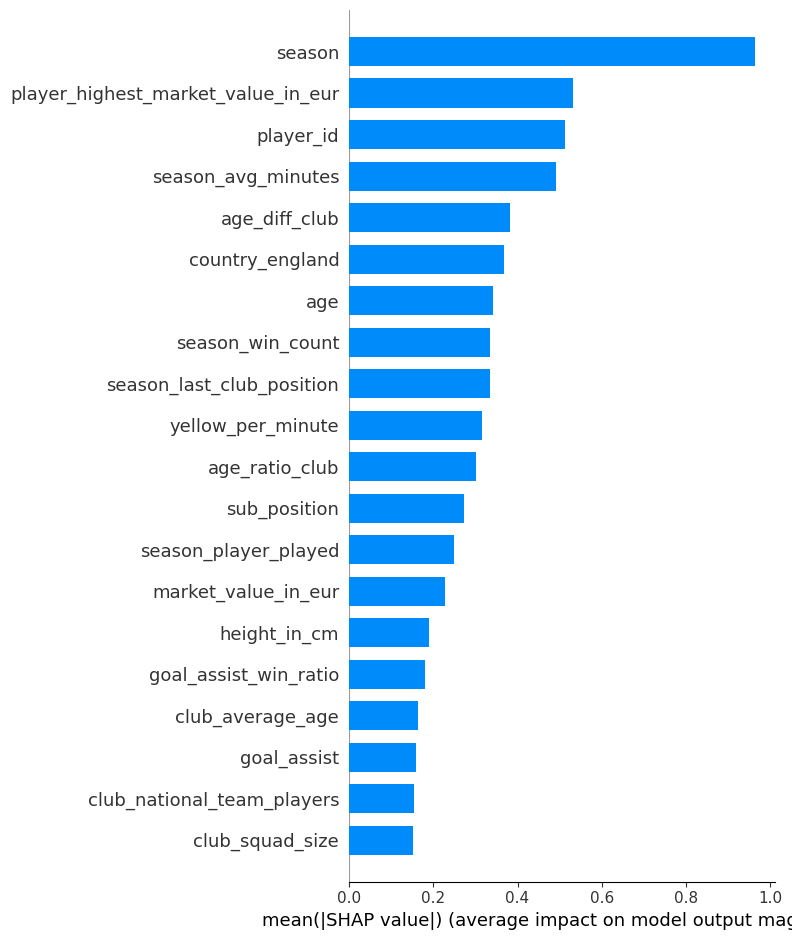

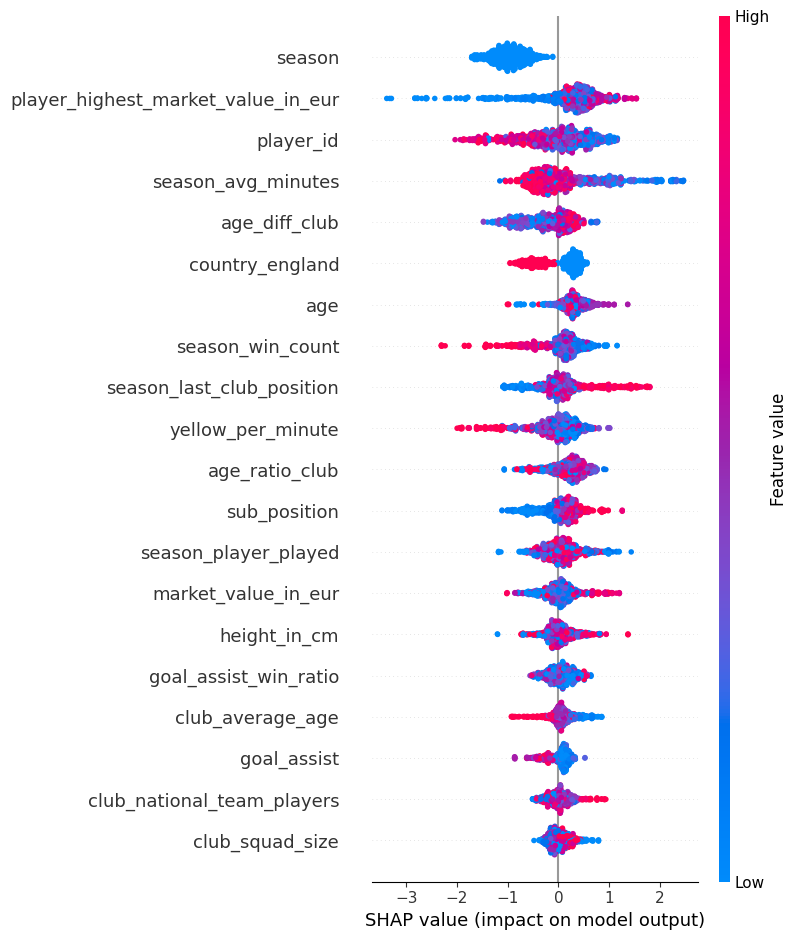

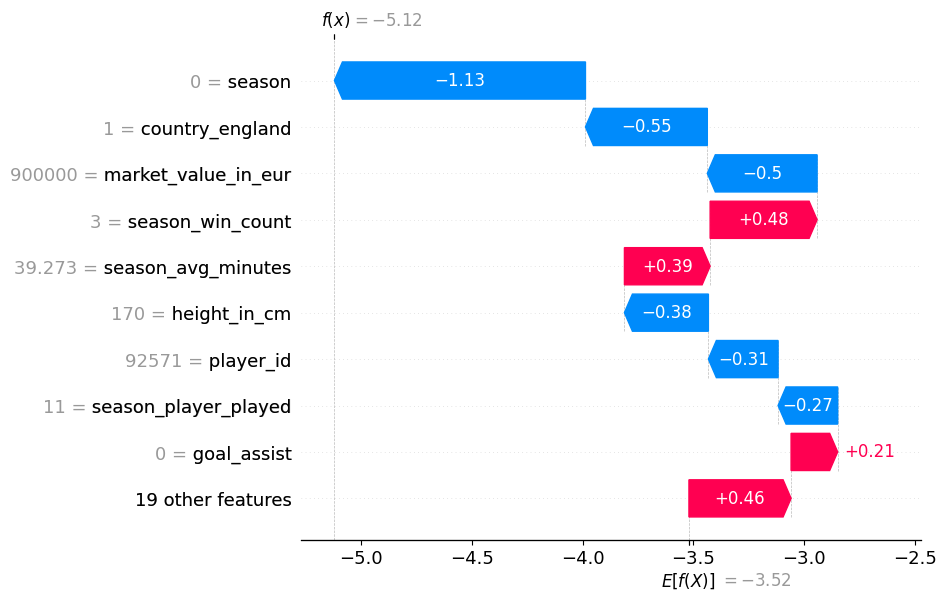

In [95]:
import shap
import matplotlib.pyplot as plt

# -----------------------------
# 1. SHAP Explainer 생성
# -----------------------------
explainer = shap.Explainer(model, X_train)  # XGBoost 모델과 train 데이터
shap_values = explainer(X_valid)           # valid 데이터 기준 SHAP 값 계산

# -----------------------------
# 2. Feature importance summary plot
# -----------------------------
shap.summary_plot(shap_values, X_valid, plot_type="bar")  # 중요도 막대 그래프
shap.summary_plot(shap_values, X_valid)                   # 전체 SHAP 값 점 그래프

# -----------------------------
# 3. 개별 피처 영향 확인 (선택)
# -----------------------------
# 예: 첫 번째 샘플에 대한 SHAP 값
shap.plots.waterfall(shap_values[0])


In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# 1. DMatrix 생성
# -----------------------------
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(df_validation.drop("transfer", axis=1), label=df_validation["transfer"])

# -----------------------------
# 2. 파라미터 설정
# -----------------------------
pos = sum(y_train == 1)
neg = sum(y_train == 0)
scale_pos_weight = neg / pos

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': scale_pos_weight,
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# -----------------------------
# 3. 학습 (early stopping 적용)
# -----------------------------
evals = [(dtrain, 'train'), (dvalid, 'valid')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

# -----------------------------
# 4. Valid 예측
# -----------------------------
y_valid_pred = bst.predict(dvalid)
y_valid_pred_label = (y_valid_pred > 0.5).astype(int)

# -----------------------------
# 5. Valid 평가
# -----------------------------
y_valid_true = df_validation["transfer"]

acc = accuracy_score(y_valid_true, y_valid_pred_label)
prec = precision_score(y_valid_true, y_valid_pred_label)
rec = recall_score(y_valid_true, y_valid_pred_label)
f1 = f1_score(y_valid_true, y_valid_pred_label)

print(f"Valid -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")


[0]	train-logloss:0.67034	valid-logloss:0.68723
[1]	train-logloss:0.65079	valid-logloss:0.68055
[2]	train-logloss:0.63311	valid-logloss:0.67624
[3]	train-logloss:0.61923	valid-logloss:0.67079
[4]	train-logloss:0.60745	valid-logloss:0.66754
[5]	train-logloss:0.59675	valid-logloss:0.66590
[6]	train-logloss:0.58653	valid-logloss:0.65800
[7]	train-logloss:0.57706	valid-logloss:0.65665
[8]	train-logloss:0.56786	valid-logloss:0.65423
[9]	train-logloss:0.56082	valid-logloss:0.65022
[10]	train-logloss:0.55318	valid-logloss:0.64652
[11]	train-logloss:0.54621	valid-logloss:0.64489
[12]	train-logloss:0.53924	valid-logloss:0.64879
[13]	train-logloss:0.53161	valid-logloss:0.64792
[14]	train-logloss:0.52610	valid-logloss:0.64399
[15]	train-logloss:0.51989	valid-logloss:0.63788
[16]	train-logloss:0.51491	valid-logloss:0.63279
[17]	train-logloss:0.50952	valid-logloss:0.62523
[18]	train-logloss:0.50296	valid-logloss:0.62337
[19]	train-logloss:0.49797	valid-logloss:0.62117
[20]	train-logloss:0.49428	val

In [100]:
# -----------------------------
# 1. 라이브러리 불러오기
# -----------------------------
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# -----------------------------
# 2. Train/Test 분리 (이미 8,000개 데이터)
# -----------------------------
# X_train, X_test, y_train, y_test는 이미 준비된 상태라고 가정

# -----------------------------
# 3. SMOTE 오버샘플링 적용
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", pd.Series(y_train_res).value_counts())

# -----------------------------
# 4. XGBoost 모델 정의
# -----------------------------
pos = sum(y_train_res == 1)
neg = sum(y_train_res == 0)
scale_pos_weight = neg / pos  # SMOTE 적용 후에도 ratio 확인

model = XGBClassifier(
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# -----------------------------
# 5. 모델 학습 (train/test 평가용)
# -----------------------------
# train으로 학습 후 test 평가
model.fit(X_train_res, y_train_res)

def print_metrics(y_true, y_pred, name="Dataset"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

# -----------------------------
# 6. Train / Test 평가
# -----------------------------
y_train_pred = model.predict(X_train_res)
y_test_pred = model.predict(X_test)

print_metrics(y_train_res, y_train_pred, "Train")
print_metrics(y_test, y_test_pred, "Test")

# -----------------------------
# 7. Valid 데이터 평가
# -----------------------------
X_valid = df_validation.drop("transfer", axis=1)
y_valid = df_validation["transfer"]

y_valid_pred = model.predict(X_valid)
print_metrics(y_valid, y_valid_pred, "Valid")


Before SMOTE: transfer
0    6522
1    1508
Name: count, dtype: int64
After SMOTE : transfer
1    6522
0    6522
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:14:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train -> Accuracy: 0.9980, Precision: 0.9994, Recall: 0.9966, F1-score: 0.9980
Test -> Accuracy: 0.9626, Precision: 0.9364, Recall: 0.8594, F1-score: 0.8963
Valid -> Accuracy: 0.8406, Precision: 1.0000, Recall: 0.4758, F1-score: 0.6448
